In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots


In [2]:
df = pd.read_csv(r"C:\Users\Abdul\Documents\AI\DEPI\Grad Project\Dataset\superstore_dataset2011-2015.csv", encoding = "ISO-8859-1")
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,42433,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,...,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium
1,22253,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium
2,48883,HU-2011-1220,1/1/2011,5/1/2011,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,...,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High
3,11731,IT-2011-3647632,1/1/2011,5/1/2011,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,...,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High
4,22255,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium


In [3]:
df.isna().sum()

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64

In [4]:
df.duplicated().sum()

0

In [5]:
df.drop(['Postal Code','Row ID','Order ID','Customer ID','Customer Name','Product ID'], axis=1, inplace=True)

In [6]:
df.describe()

,Sales,Quantity,Discount,Profit,Shipping Cost
count,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,246.490581,3.476545,0.142908,28.610982,26.375915
std,487.565361,2.278766,0.212280,174.340972,57.296804
min,0.444000,1.000000,0.000000,-6599.978000,0.000000
25%,30.758625,2.000000,0.000000,0.000000,2.610000
50%,85.053000,3.000000,0.000000,9.240000,7.790000
75%,251.053200,5.000000,0.200000,36.810000,24.450000
max,22638.480000,14.000000,0.850000,8399.976000,933.570000


In [7]:
# Compute the z-scores for the Sales column and filter out rows with a z-score greater than 3
df = df[np.abs(zscore(df['Sales'])) < 3]
print("Shape after removing outliers using z-score:", df.shape)

Shape after removing outliers using z-score: (50270, 18)


In [8]:
df = df[(df["Sales"] >= 5)]
df

,Order Date,Ship Date,Ship Mode,Segment,City,State,Country,Market,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,1/1/2011,6/1/2011,Standard Class,Consumer,Constantine,Constantine,Algeria,Africa,Africa,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.1400,35.46,Medium
1,1/1/2011,8/1/2011,Standard Class,Consumer,Wagga Wagga,New South Wales,Australia,APAC,Oceania,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.0360,9.72,Medium
2,1/1/2011,5/1/2011,Second Class,Consumer,Budapest,Budapest,Hungary,EMEA,EMEA,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.6400,8.17,High
3,1/1/2011,5/1/2011,Second Class,Home Office,Stockholm,Stockholm,Sweden,EU,North,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.0550,4.82,High
4,1/1/2011,8/1/2011,Standard Class,Consumer,Wagga Wagga,New South Wales,Australia,APAC,Oceania,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.7700,4.70,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51283,31-12-2014,7/1/2015,Standard Class,Corporate,Shantou,Guangdong,China,APAC,North Asia,Office Supplies,Paper,"Eaton Note Cards, 8.5 x 11",79.470,3,0.0,25.3800,1.41,Medium
51284,31-12-2014,4/1/2015,Standard Class,Home Office,Reynosa,Tamaulipas,Mexico,LATAM,North,Office Supplies,Labels,"Novimex Legal Exhibit Labels, Adjustable",16.740,3,0.0,0.6600,1.32,Medium
51285,31-12-2014,4/1/2015,Standard Class,Corporate,Fairfield,California,United States,US,West,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188,0.89,Medium
51287,31-12-2014,2/1/2015,Second Class,Consumer,Managua,Managua,Nicaragua,LATAM,Central,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26.400,3,0.0,12.3600,0.35,Medium


In [9]:
df.describe()

,Sales,Quantity,Discount,Profit,Shipping Cost
count,49308.000000,49308.000000,49308.000000,49308.000000,49308.000000
mean,200.751841,3.449927,0.138056,20.043904,21.941107
std,283.405686,2.234355,0.206928,111.408830,39.544178
min,5.000000,1.000000,0.000000,-2380.350000,0.000000
25%,31.984000,2.000000,0.000000,0.000000,2.740000
50%,84.955000,3.000000,0.000000,9.331200,7.780000
75%,241.645950,5.000000,0.200000,35.460000,23.190000
max,1708.740000,14.000000,0.850000,829.500000,704.060000


Text(0.5, 1.0, 'Histogram of Sales')

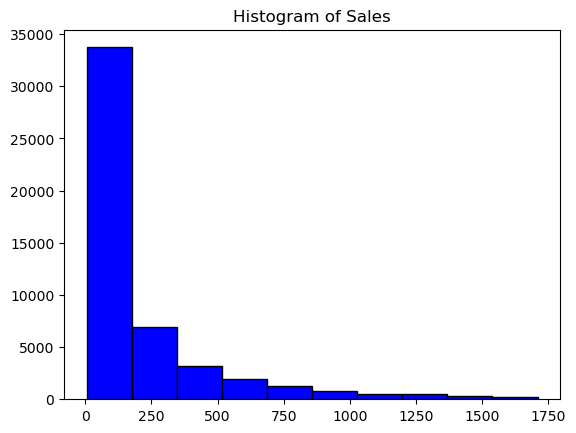

In [10]:
plt.hist(df['Sales'], bins= 10, color = 'blue', edgecolor = 'black')
plt.title('Histogram of Sales')

In [11]:
from dateutil.parser import parse

def robust_date_parser(date_str):
    """
    Attempts to parse a date string using dateutil's parser with fuzzy matching.
    Returns a datetime object if successful, otherwise pd.NaT.
    """
    try:
        # Try parsing with fuzzy matching (ignores unknown tokens)
        return parse(date_str, fuzzy=True)
    except Exception:
        return pd.NaT

# Apply the robust date parser to handle various date formats for both columns
df['Order Date'] = df['Order Date'].apply(lambda x: robust_date_parser(x) if pd.notnull(x) else pd.NaT)
df['Ship Date'] = df['Ship Date'].apply(lambda x: robust_date_parser(x) if pd.notnull(x) else pd.NaT)

# Optional: Print out some of the parsed dates to verify
print(df[['Order Date', 'Ship Date']].head())

  Order Date  Ship Date
0 2011-01-01 2011-06-01
1 2011-01-01 2011-08-01
2 2011-01-01 2011-05-01
3 2011-01-01 2011-05-01
4 2011-01-01 2011-08-01


In [12]:
df['Order Date']

0       2011-01-01
1       2011-01-01
2       2011-01-01
3       2011-01-01
4       2011-01-01
           ...    
51283   2014-12-31
51284   2014-12-31
51285   2014-12-31
51287   2014-12-31
51288   2014-12-31
Name: Order Date, Length: 49308, dtype: datetime64[ns]

In [13]:
df.to_csv('dataset.csv', index=False)

In [14]:
df.head(10)

,Order Date,Ship Date,Ship Mode,Segment,City,State,Country,Market,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,2011-01-01,2011-06-01,Standard Class,Consumer,Constantine,Constantine,Algeria,Africa,Africa,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.00,106.1400,35.46,Medium
1,2011-01-01,2011-08-01,Standard Class,Consumer,Wagga Wagga,New South Wales,Australia,APAC,Oceania,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.10,36.0360,9.72,Medium
2,2011-01-01,2011-05-01,Second Class,Consumer,Budapest,Budapest,Hungary,EMEA,EMEA,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.00,29.6400,8.17,High
3,2011-01-01,2011-05-01,Second Class,Home Office,Stockholm,Stockholm,Sweden,EU,North,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.50,-26.0550,4.82,High
4,2011-01-01,2011-08-01,Standard Class,Consumer,Wagga Wagga,New South Wales,Australia,APAC,Oceania,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.10,37.7700,4.70,Medium
5,2011-01-01,2011-08-01,Standard Class,Consumer,Wagga Wagga,New South Wales,Australia,APAC,Oceania,Office Supplies,Paper,"Eaton Computer Printout Paper, 8.5 x 11",55.242,2,0.10,15.3420,1.80,Medium
6,2011-01-02,2011-03-02,Second Class,Consumer,Dhaka,Dhaka,Bangladesh,APAC,Central Asia,Technology,Copiers,"Brother Personal Copier, Laser",285.780,2,0.00,71.4000,57.30,Critical
7,2011-01-02,2011-03-02,First Class,Consumer,Mission Viejo,California,United States,US,West,Furniture,Bookcases,"Sauder Facets Collection Library, Sky Alder Fi...",290.666,2,0.15,3.4196,54.64,High
8,2011-01-02,2011-04-02,Second Class,Corporate,Luanda,Luanda,Angola,Africa,Africa,Office Supplies,Storage,"Fellowes Lockers, Wire Frame",206.400,1,0.00,92.8800,53.08,Critical
9,2011-01-02,2011-03-02,Second Class,Corporate,Yingcheng,Hubei,China,APAC,North Asia,Office Supplies,Storage,"Tenex Trays, Single Width",162.720,3,0.00,68.3100,44.36,Critical


# Visualization

C:\Users\Abdul\AppData\Local\Temp\ipykernel_15400\1912682840.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=shipping_counts.index, y=shipping_counts.values, palette="viridis")


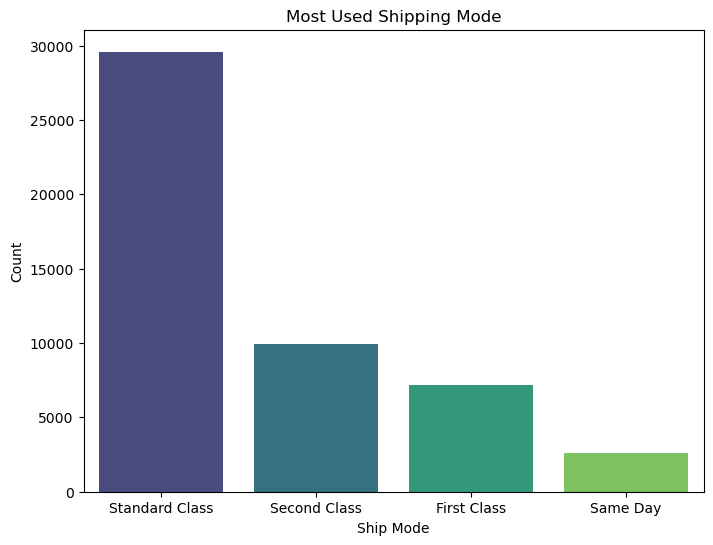

In [15]:
shipping_counts = df['Ship Mode'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=shipping_counts.index, y=shipping_counts.values, palette="viridis")
plt.title("Most Used Shipping Mode")
plt.xlabel("Ship Mode")
plt.ylabel("Count")
plt.show()

C:\Users\Abdul\AppData\Local\Temp\ipykernel_15400\716830642.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=segment_counts.index, y=segment_counts.values, palette="viridis")


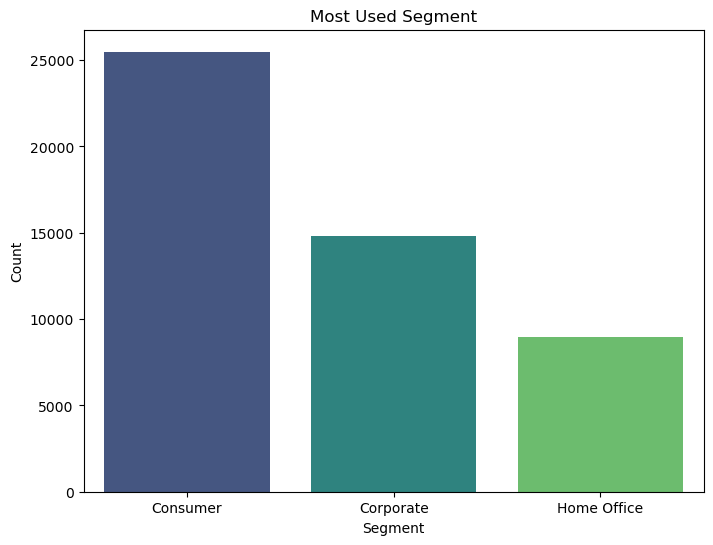

In [16]:
segment_counts = df['Segment'].value_counts()

plt.figure(figsize=(8,6))
sns.barplot(x=segment_counts.index, y=segment_counts.values, palette="viridis")
plt.title("Most Used Segment")
plt.xlabel("Segment")
plt.ylabel("Count")
plt.show()

In [17]:
subcategory_counts = df.groupby(["Category", "Sub-Category"]).size().reset_index(name="Count")
category_sales = df.groupby("Category")["Sales"].sum().reset_index()
# Identify the most frequent subcategory in each category
top_subcategories = subcategory_counts.loc[subcategory_counts.groupby("Category")["Count"].idxmax()]

# Create subplots layout
fig = make_subplots(rows=1, cols=2, 
                    subplot_titles=["Most Frequent Subcategory", "Total Sales per Category"], 
                    specs=[[{"type": "bar"}, {"type": "bar"}]])

# Bar Chart: Most Frequent Subcategory in Each Category
fig.add_trace(go.Bar(x=top_subcategories["Category"], y=top_subcategories["Count"], 
                     text=top_subcategories["Sub-Category"], textposition="auto",
                     marker=dict(color="royalblue"), name="Most Frequent Subcategory"), row=1, col=1)

# Bar Chart: Total Sales per Category
fig.add_trace(go.Bar(x=category_sales["Category"], y=category_sales["Sales"], 
                     marker=dict(color="darkorange"), name="Total Sales"), row=1, col=2)

# Update layout
fig.update_layout(title_text="Category Insights", showlegend=True, height=500, width=1000)



# Show figures
fig.show()

In [18]:
# Sunburst Chart for Categories and Subcategories
fig_sunburst = px.sunburst(subcategory_counts, path=["Category", "Sub-Category"], values="Count", 
                           title="Category and Subcategory Distribution", color="Category")
fig_sunburst.show()

In [19]:
# Aggregate data for most sold products
product_counts = df.groupby("Product Name").size().reset_index(name="Count")
top_products = product_counts.sort_values(by="Count", ascending=False).head(10)  # Top 10 products

# Aggregate data for most sold product in each region
region_product_counts = df.groupby(["Region", "Product Name"]).size().reset_index(name="Count")
top_region_products = region_product_counts.loc[region_product_counts.groupby("Region")["Count"].idxmax()]

In [20]:
# Create subplots layout
fig = make_subplots(rows=1, cols=2, 
                    subplot_titles=["Top 10 Most Sold Products", "Most Sold Product in Each Region"], 
                    specs=[[{"type": "bar"}, {"type": "bar"}]])

# Bar Chart: Top 10 Most Sold Products
fig.add_trace(go.Bar(x=top_products["Product Name"], y=top_products["Count"], 
                     marker=dict(color="green"), name="Most Sold Products"), row=1, col=1)

# Sort top_region_products by the 'Count' column in descending order
top_region_products_sorted = top_region_products.sort_values(by="Count", ascending=False)

# Bar Chart: Most Sold Product in Each Region, sorted by Count
fig.add_trace(go.Bar(x=top_region_products_sorted["Region"], y=top_region_products_sorted["Count"],
                     text=top_region_products_sorted["Product Name"], textposition="auto",
                     marker=dict(color="purple"), name="Most Sold Product by Region"), row=1, col=2)

# Update layout
fig.update_layout(title_text="Product Sales Insights", showlegend=True, height=720, width=1280,)

# Show figure
fig.show()

In [21]:
state_sales = df.groupby("Country")["Sales"].sum().sort_values(ascending = False)
state_sales = state_sales.reset_index().head(10)
plt.figure(figsize=(5,10))
px.bar(state_sales , x = "Country" , y = "Sales" , title="Top 10 Countries which generated Highest Sales (2011-2015)")

<Figure size 500x1000 with 0 Axes>

In [22]:
# Aggregate profit data by region and sort by Profit
region_profit = df.groupby("Region")["Profit"].sum().reset_index().sort_values("Profit", ascending=False)

# Create bar chart for profit by region
fig = go.Figure(data=[go.Bar(x=region_profit["Region"], y=region_profit["Profit"], 
                             marker=dict(color="blue"))])

# Update layout
fig.update_layout(title="Total Profit by Region", xaxis_title="Region", yaxis_title="Total Profit",
                  height=500, width=800)

# Show figure
fig.show()


In [23]:
state_sales = df.groupby("Region")["Quantity"].count().sort_values(ascending = False)
state_sales = state_sales.reset_index()
plt.figure(figsize=(5,10))
px.bar(state_sales , x = "Region" , y = "Quantity" , title="Sold Quantity in each Region")

<Figure size 500x1000 with 0 Axes>

In [24]:
region_sales = df.groupby("Region", as_index=False)["Sales"].sum().sort_values(by="Sales", ascending=False)

fig = px.pie(region_sales, 
             values="Sales", 
             names="Region", 
             title="Sales Percentage by Region", 
             hole=0.4,  # Converts it to a ring (donut) chart
             color_discrete_sequence=px.colors.qualitative.Set3  # Sets color theme
            )

# Set the pie chart to display in clockwise direction
fig.update_traces(direction="clockwise")

fig.update_layout(
    title_font=dict(size=20, family="Arial", color="black"),
    legend_title="Regions",
    legend=dict(font=dict(size=12)),
    paper_bgcolor="white"  # Background color
)

fig.show()

In [25]:
# Aggregate profit data by country
country_profit = df.groupby("Country")["Profit"].sum().reset_index()

# Filter countries with negative profit, sort them to get the worst negatives, and pick the top 10
top_negative_profit_countries = country_profit[country_profit["Profit"] < 0].sort_values(by="Profit").head(10)

# Create bar chart using the absolute profit values so the bars go upward
fig = go.Figure(data=[go.Bar(x=top_negative_profit_countries["Country"],
                             y=top_negative_profit_countries["Profit"].abs(),
                             marker=dict(color="red"),
                             textposition="auto")])

# Update layout
fig.update_layout(title="Top 10 Countries with the Most Negative Profit",
                  xaxis_title="Country",
                  yaxis_title="Profit loss",
                  height=500, width=900, xaxis_tickangle=-45)

fig.show()
